In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = 'P:/CoxaAI/preprocess_data/csv_detection_info/sortering 2/CC.csv'
filename_clean = 'P:/CoxaAI/preprocess_data/csv_detection_info_clean/sortering 2/CC.csv'
saved_cropped_image = 'P:/CoxaAI/preprocess_data/cropped/sortering 2/CC'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    P:/CoxaAI/Sortering 2/CC   
1    P:/CoxaAI/Sortering 2/CC   
2    P:/CoxaAI/Sortering 2/CC   
3    P:/CoxaAI/Sortering 2/CC   
4    P:/CoxaAI/Sortering 2/CC   
..                        ...   
198  P:/CoxaAI/Sortering 2/CC   
199  P:/CoxaAI/Sortering 2/CC   
200  P:/CoxaAI/Sortering 2/CC   
201  P:/CoxaAI/Sortering 2/CC   
202  P:/CoxaAI/Sortering 2/CC   

                                              filename parent_name  \
0             1.2.276.0.95.17743.20230119.143825.0.dcm  1-22053960   
1             1.2.276.0.95.17743.20230119.143825.0.dcm  1-22053960   
2             1.2.276.0.95.17743.20230119.144319.0.dcm  1-22053960   
3             1.2.276.0.95.17743.20230119.144319.0.dcm  1-22053960   
4    1.3.51.0.7.12079813791.6258.41290.34856.13332....  1-22077936   
..                                                 ...         ...   
198  1.3.51.0.7.1942221423.59254.7494.33119.12178.1...  1-23010241   
199   1.2.276.0.95.15181.1.20230131.165939.0.2.962.dcm  1-23010787   
200   1.2.276.0.95.15181.1.20230131.165939.0.2.962.dcm  1-23010787   
201   1.2.276.0.95.15181.1.20230131.170018.0.2.963.dcm  1-23010787   
202   1.2.276.0.95.15181.1.20230131.170018.0.2.963.dcm  1-23010787   

                                             crop_name  ax0_min  ax0_max  \
0          1.2.276.0.95.17743.20230119.143825.0.dcm_h1     1213     1346   
1          1.2.276.0.95.17743.20230119.143825.0.dcm_h2     1218     1353   
2          1.2.276.0.95.17743.20230119.144319.0.dcm_h1     1368     1500   
3          1.2.276.0.95.17743.20230119.144319.0.dcm_h2     1346     1479   
4    1.3.51.0.7.12079813791.6258.41290.34856.13332....      504      770   
..                                                 ...      ...      ...   
198  1.3.51.0.7.1942221423.59254.7494.33119.12178.1...      878     1064   
199  1.2.276.0.95.15181.1.20230131.165939.0.2.962.d...      998     1210   
200  1.2.276.0.95.15181.1.20230131.165939.0.2.962.d...      965     1179   
201  1.2.276.0.95.15181.1.20230131.170018.0.2.963.d...      928     1139   
202  1.2.276.0.95.15181.1.20230131.170018.0.2.963.d...      959     1174   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  
0       1280     1374    0.998053       False          2            CC  
1       1750     1846    0.997814       False          2            CC  
2       1745     1840    0.997380       False          2            CC  
3       1275     1369    0.994953       False          2            CC  
4        738      928    0.976046       False          2            CC  
..       ...      ...         ...         ...        ...           ...  
198     1621     1753    0.985546       False          2            CC  
199     1436     1592    0.981841       False          2            CC  
200      685      839    0.950710       False          2            CC  
201      691      842    0.881339       False          2            CC  
202     1439     1594    0.860355       False          2            CC  

[203 rows x 12 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [5]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [6]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([], dtype='int64')

Note that the crop model is very confident about its predictions

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [7]:
# plot every 9 of them

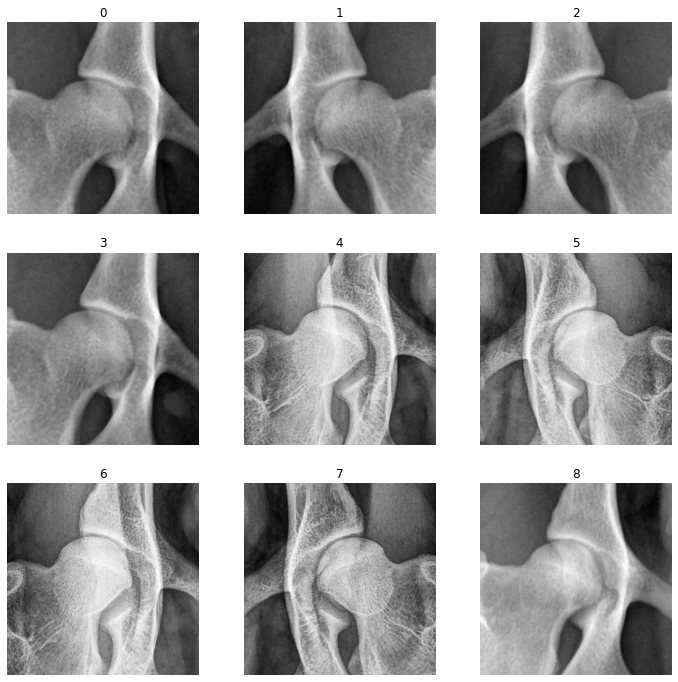

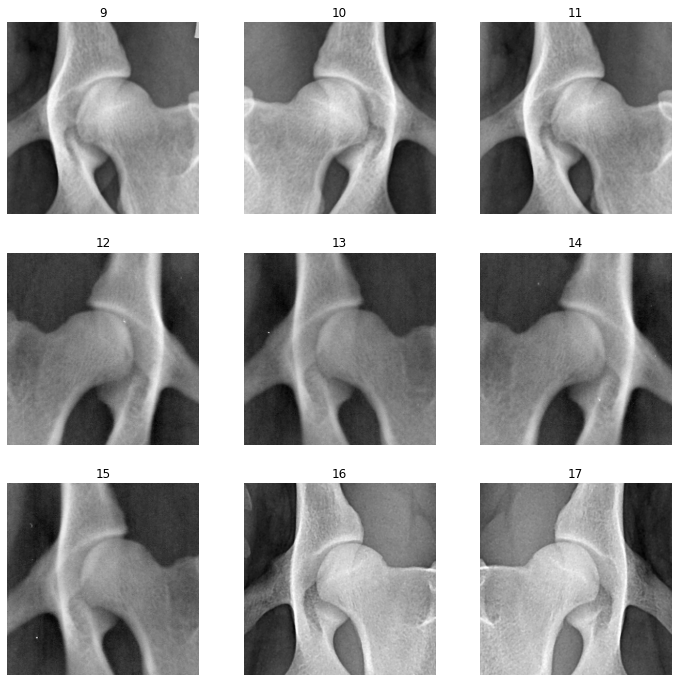

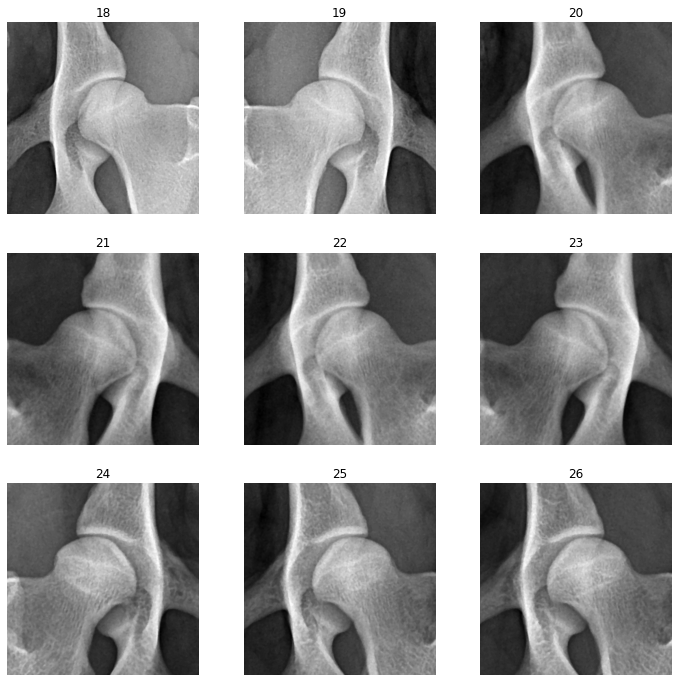

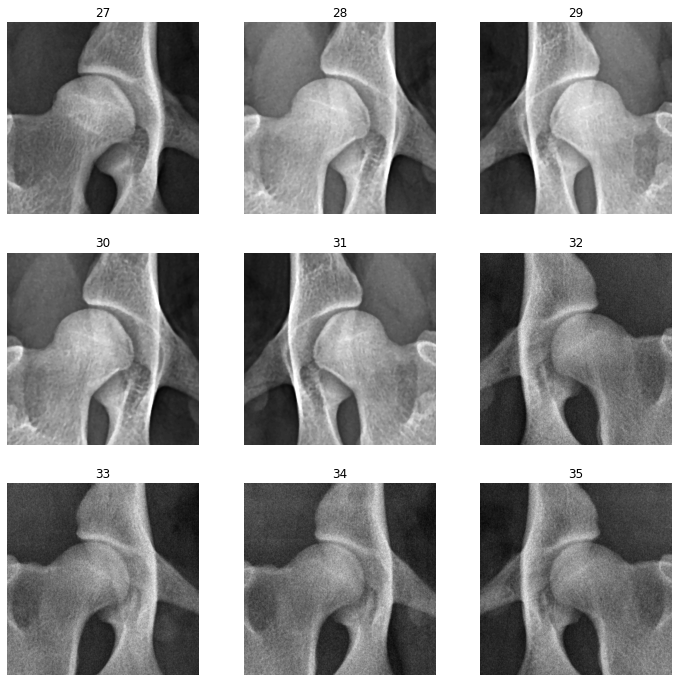

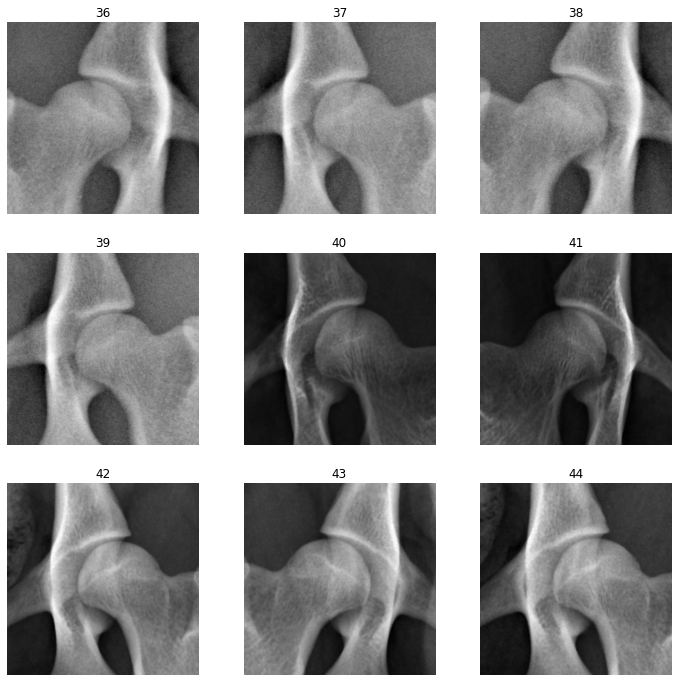

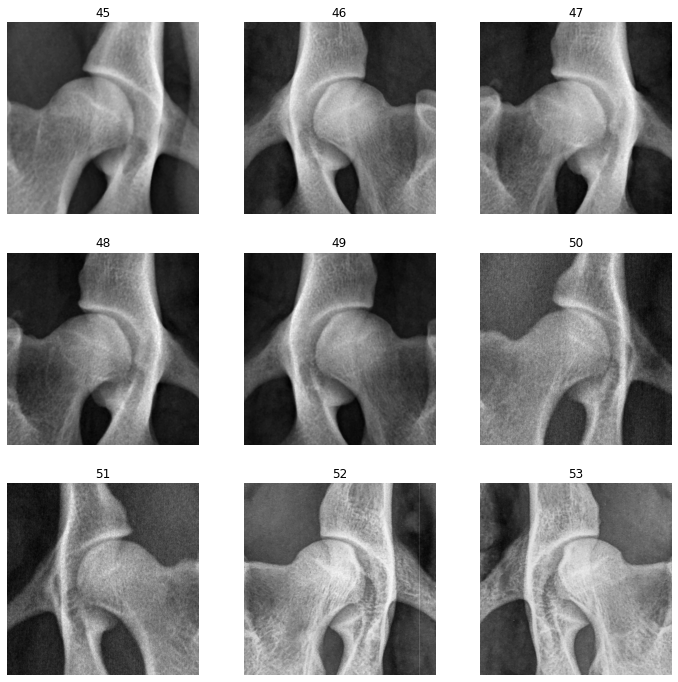

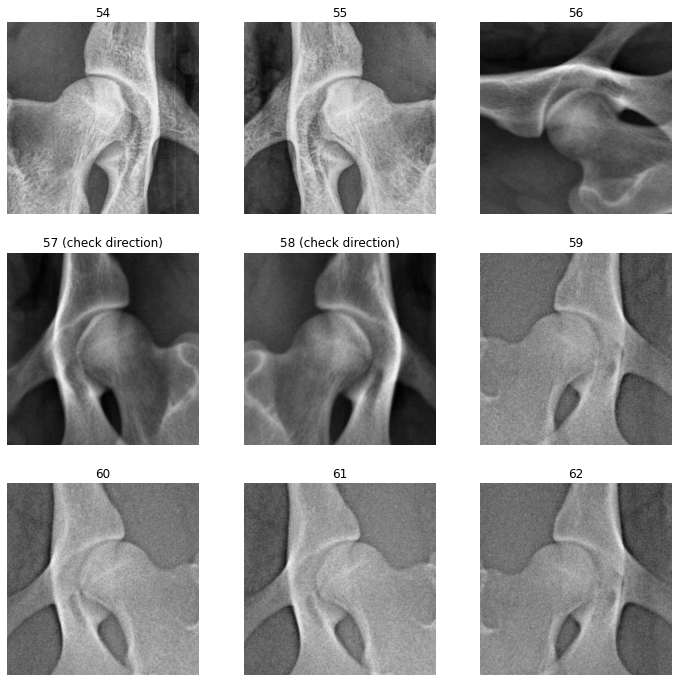

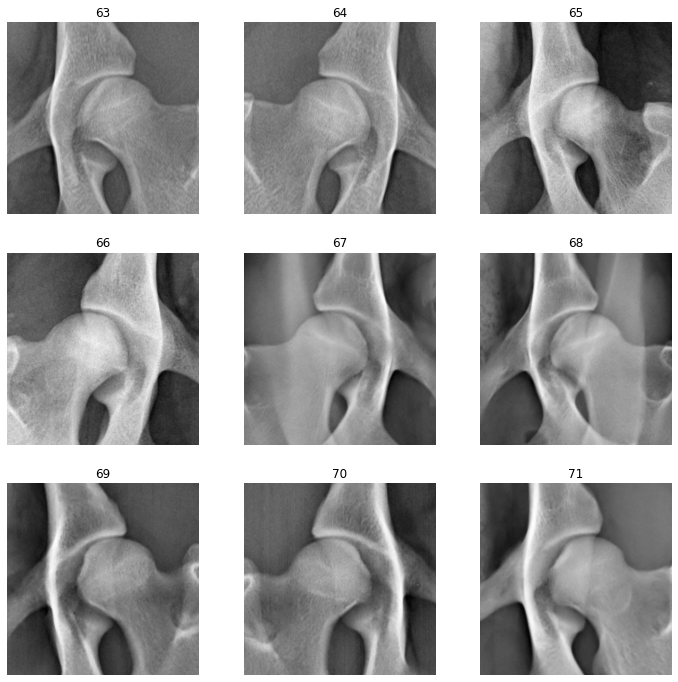

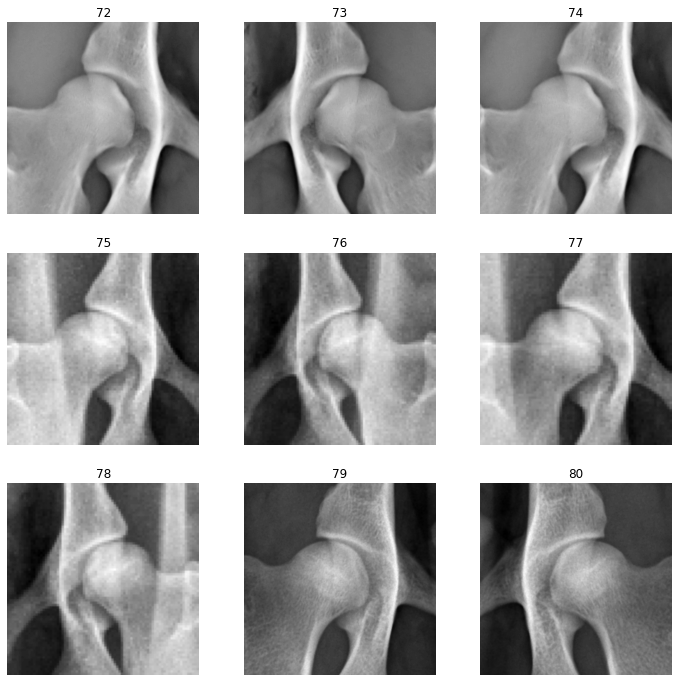

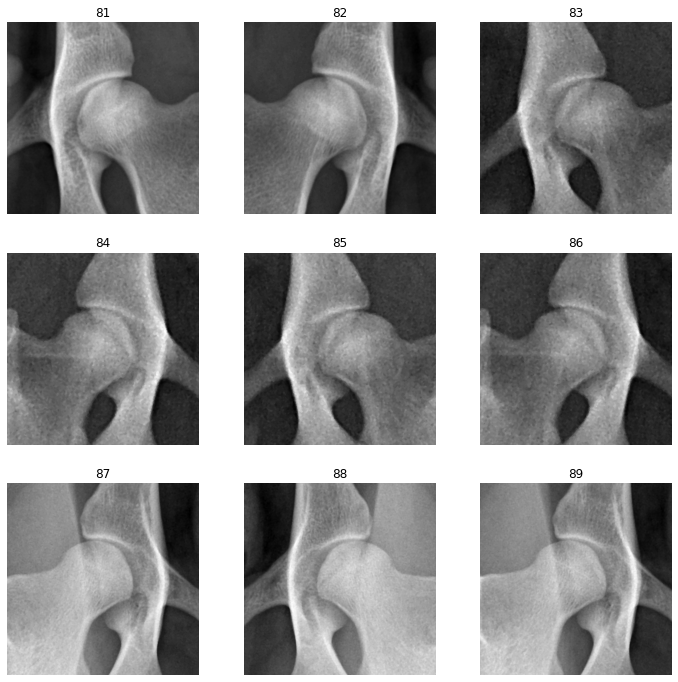

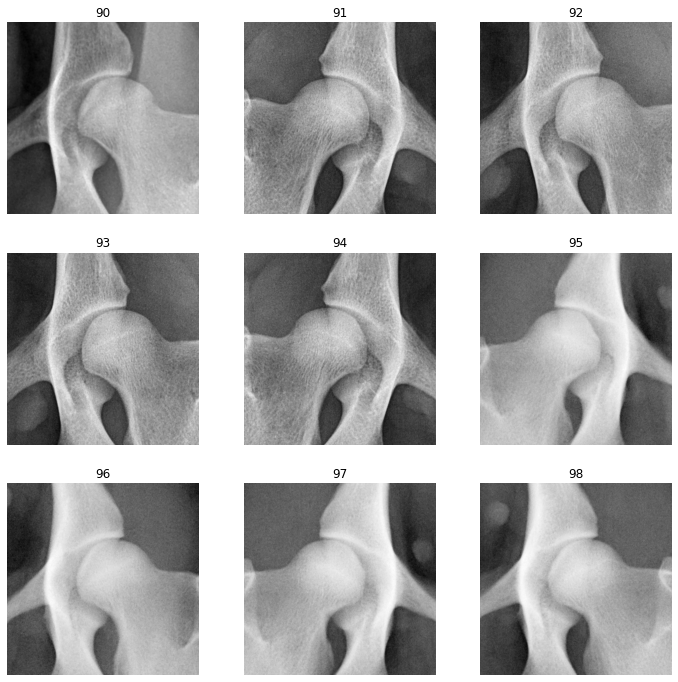

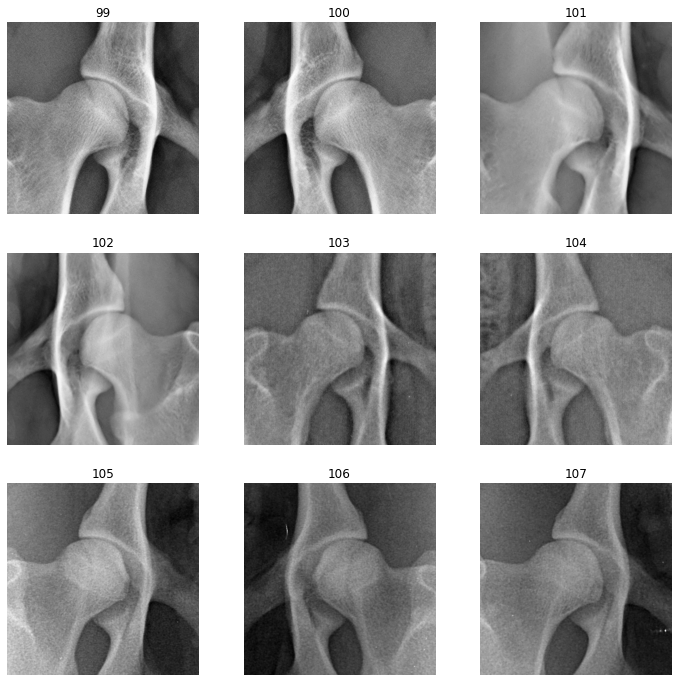

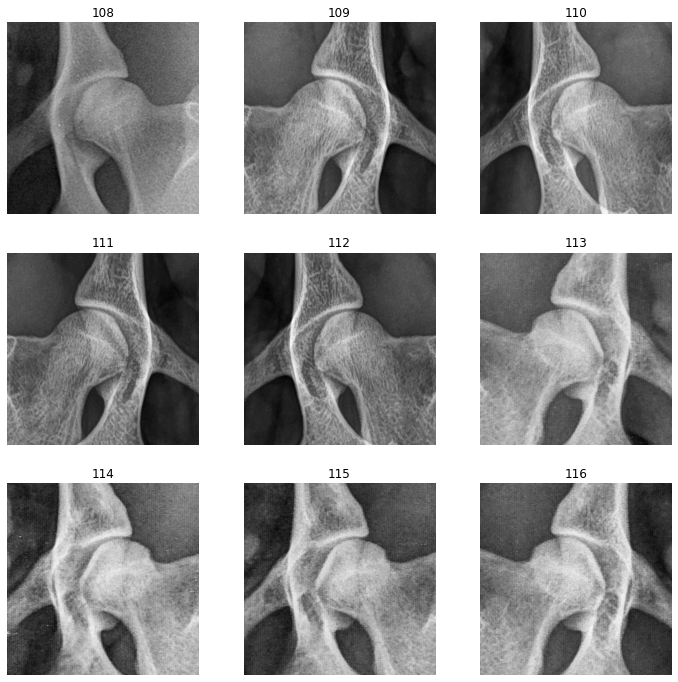

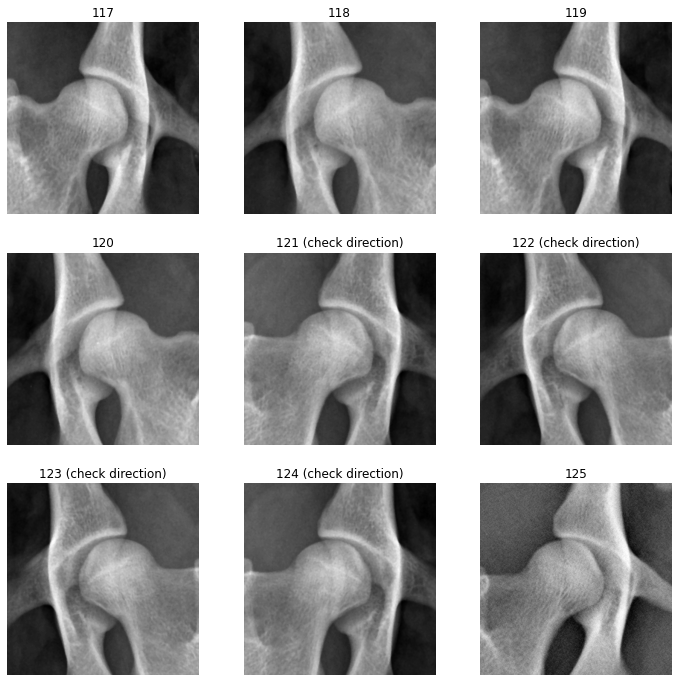

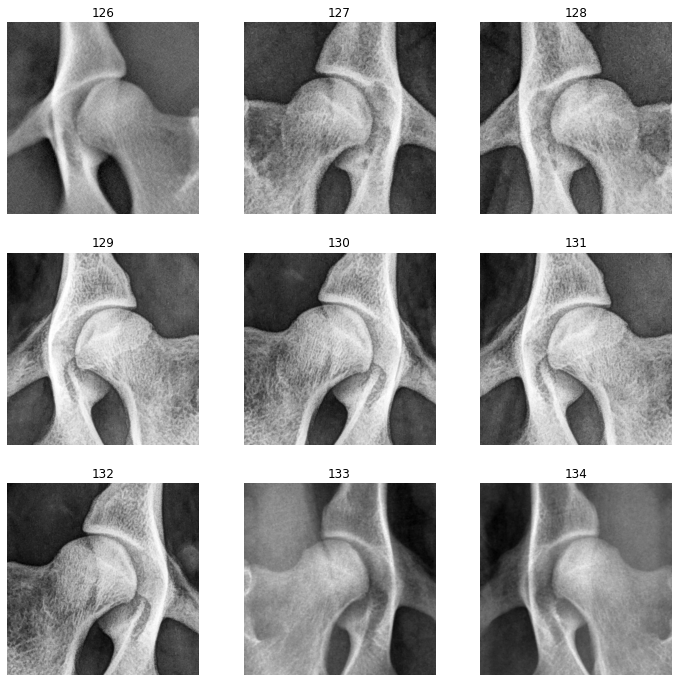

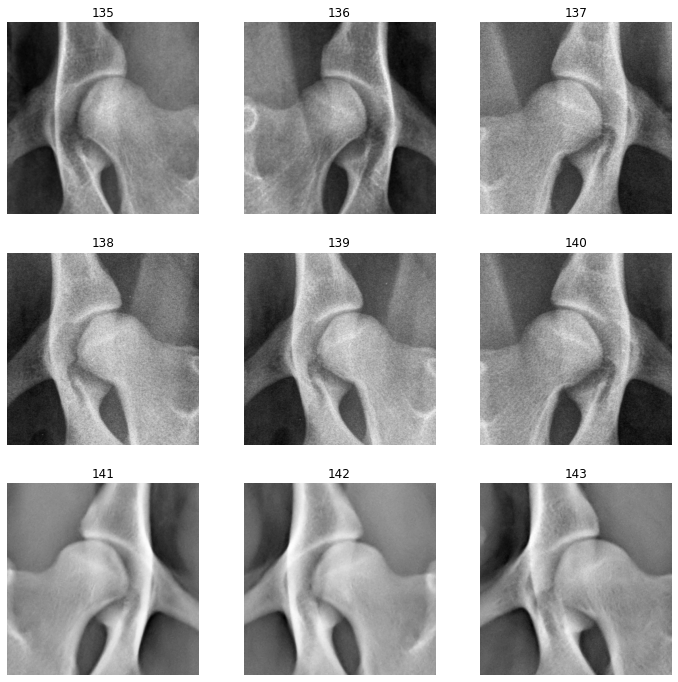

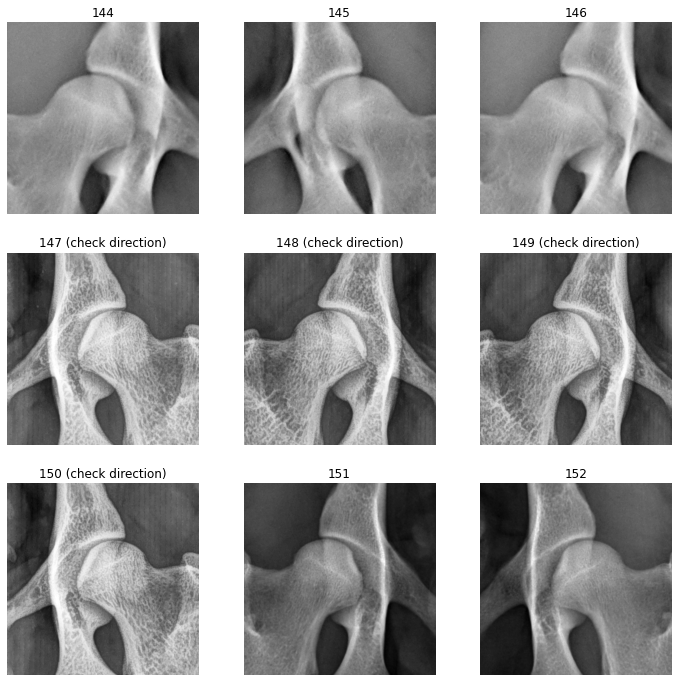

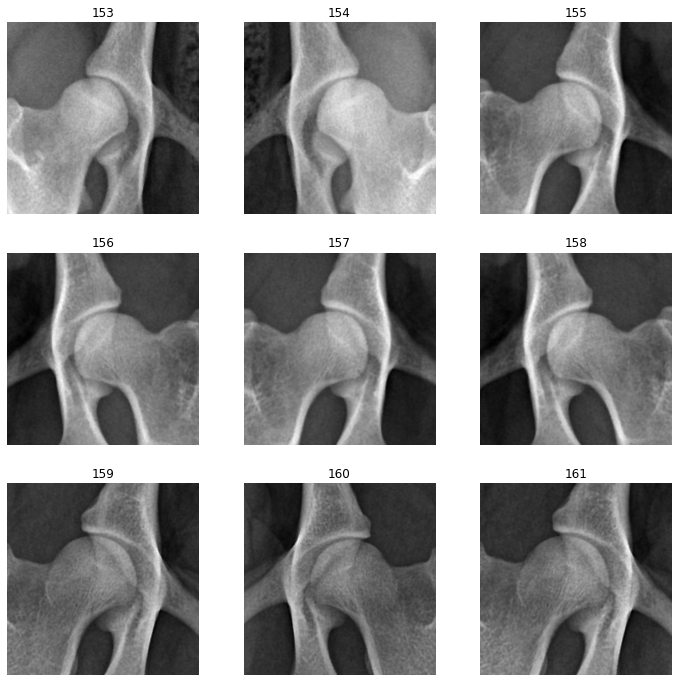

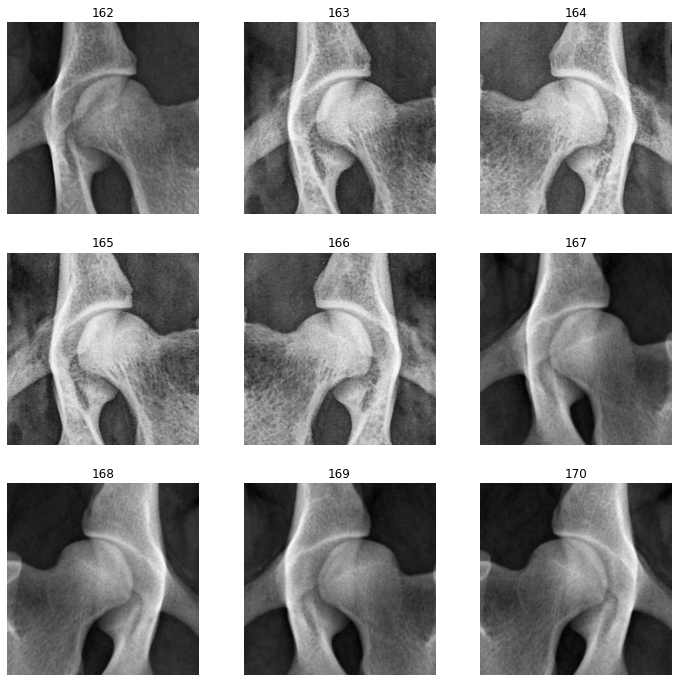

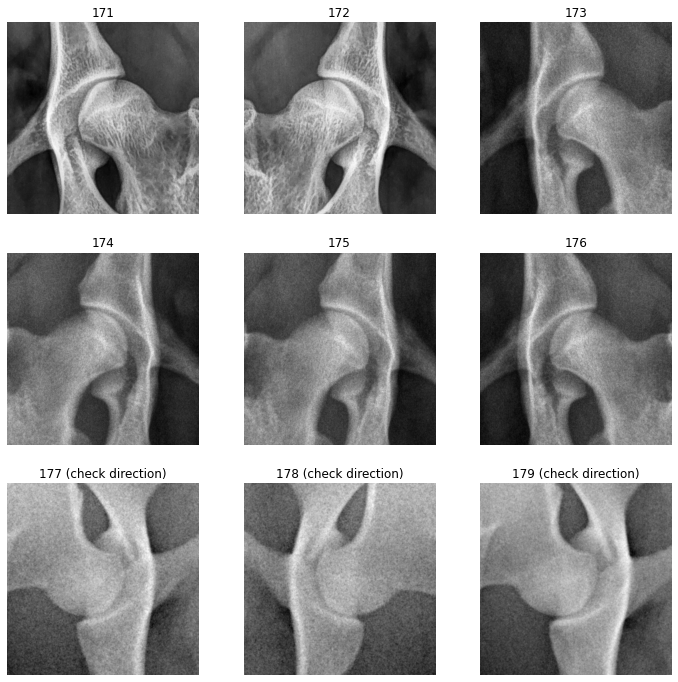

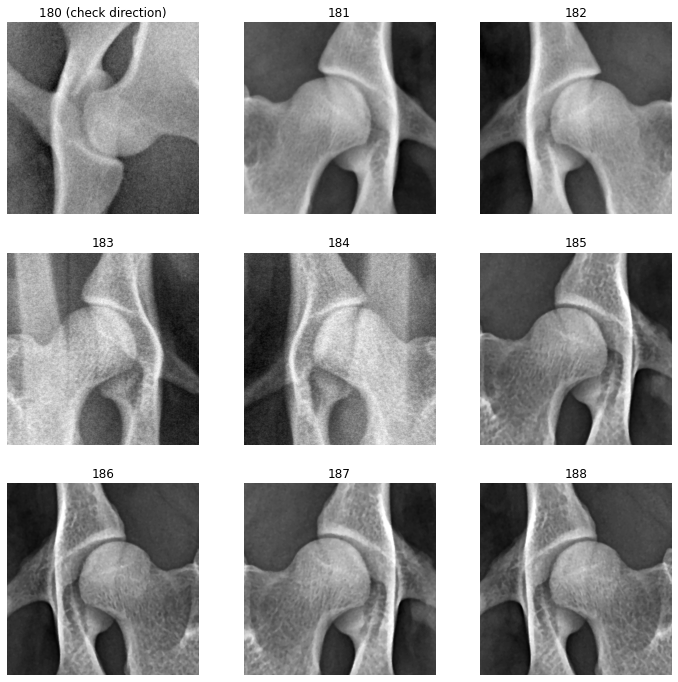

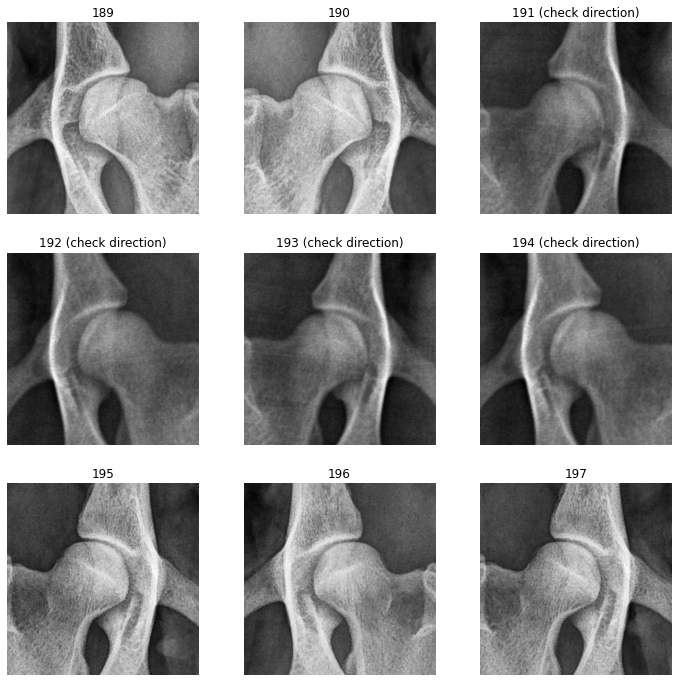

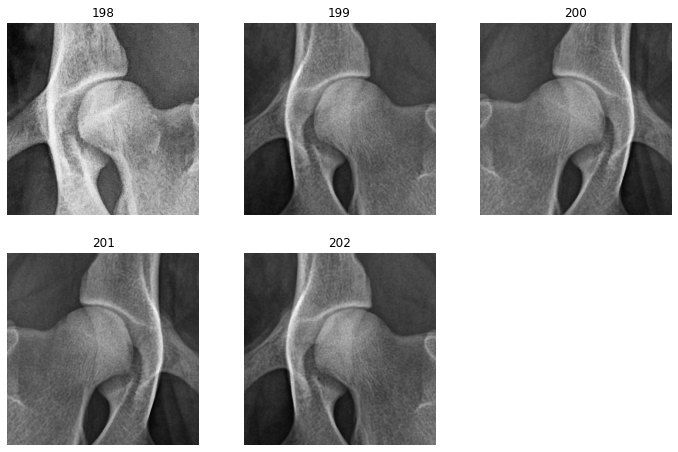

In [8]:
for id, item in detection_df.iterrows():
    fn = item['crop_name']
    img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    suffix = ' (check direction)' if item['is_rotated'] else ''
#     parent = item['parent_name']
#     if not pd.isnull(parent):
#         img = np.load(os.path.join(saved_cropped_image, parent,fn + '.npy'))
#     else:
#         img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id)+suffix)

    if (id%9) == 8:
        plt.show()                    
        
plt.show()

## Assign "flipped" column before removing failed predictions

In [9]:
flipped = np.array([False] * detection_df.shape[0])
flipped_indice = [177, 178, 179, 180]
flipped[detection_df.index.isin(flipped_indice)] = True
detection_df['flipped'] = flipped

## Remove bad detection items

In [10]:
remove_indice = [] # just to make all hips are in the right direction
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    P:/CoxaAI/Sortering 2/CC   
1    P:/CoxaAI/Sortering 2/CC   
2    P:/CoxaAI/Sortering 2/CC   
3    P:/CoxaAI/Sortering 2/CC   
4    P:/CoxaAI/Sortering 2/CC   
..                        ...   
198  P:/CoxaAI/Sortering 2/CC   
199  P:/CoxaAI/Sortering 2/CC   
200  P:/CoxaAI/Sortering 2/CC   
201  P:/CoxaAI/Sortering 2/CC   
202  P:/CoxaAI/Sortering 2/CC   

                                              filename parent_name  \
0             1.2.276.0.95.17743.20230119.143825.0.dcm  1-22053960   
1             1.2.276.0.95.17743.20230119.143825.0.dcm  1-22053960   
2             1.2.276.0.95.17743.20230119.144319.0.dcm  1-22053960   
3             1.2.276.0.95.17743.20230119.144319.0.dcm  1-22053960   
4    1.3.51.0.7.12079813791.6258.41290.34856.13332....  1-22077936   
..                                                 ...         ...   
198  1.3.51.0.7.1942221423.59254.7494.33119.12178.1...  1-23010241   
199   1.2.276.0.95.15181.1.20230131.165939.0.2.962.dcm  1-23010787   
200   1.2.276.0.95.15181.1.20230131.165939.0.2.962.dcm  1-23010787   
201   1.2.276.0.95.15181.1.20230131.170018.0.2.963.dcm  1-23010787   
202   1.2.276.0.95.15181.1.20230131.170018.0.2.963.dcm  1-23010787   

                                             crop_name  ax0_min  ax0_max  \
0          1.2.276.0.95.17743.20230119.143825.0.dcm_h1     1213     1346   
1          1.2.276.0.95.17743.20230119.143825.0.dcm_h2     1218     1353   
2          1.2.276.0.95.17743.20230119.144319.0.dcm_h1     1368     1500   
3          1.2.276.0.95.17743.20230119.144319.0.dcm_h2     1346     1479   
4    1.3.51.0.7.12079813791.6258.41290.34856.13332....      504      770   
..                                                 ...      ...      ...   
198  1.3.51.0.7.1942221423.59254.7494.33119.12178.1...      878     1064   
199  1.2.276.0.95.15181.1.20230131.165939.0.2.962.d...      998     1210   
200  1.2.276.0.95.15181.1.20230131.165939.0.2.962.d...      965     1179   
201  1.2.276.0.95.15181.1.20230131.170018.0.2.963.d...      928     1139   
202  1.2.276.0.95.15181.1.20230131.170018.0.2.963.d...      959     1174   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
0       1280     1374    0.998053       False          2            CC   
1       1750     1846    0.997814       False          2            CC   
2       1745     1840    0.997380       False          2            CC   
3       1275     1369    0.994953       False          2            CC   
4        738      928    0.976046       False          2            CC   
..       ...      ...         ...         ...        ...           ...   
198     1621     1753    0.985546       False          2            CC   
199     1436     1592    0.981841       False          2            CC   
200      685      839    0.950710       False          2            CC   
201      691      842    0.881339       False          2            CC   
202     1439     1594    0.860355       False          2            CC   

     flipped  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
198    False  
199    False  
200    False  
201    False  
202    False  

[203 rows x 13 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [15]:
exclude_ids = pd.read_csv('exclude_id.csv').id.values
new_detection_df = new_detection_df[~new_detection_df.parent_name.isin(exclude_ids)]
print(new_detection_df.shape)

(203, 13)


In [16]:
new_detection_df.to_csv(filename_clean, index=False)

In [17]:
detection_df[detection_df.index.isin(remove_indice)]

Empty DataFrame
Columns: [base_path, filename, parent_name, crop_name, ax0_min, ax0_max, ax1_min, ax1_max, confidence, is_rotated, diagnosis, diagnosis_raw, flipped]
Index: []